# 関数マップ

- https://arxiv.org/abs/adap-org/9907006
- https://arxiv.org/abs/adap-org/9907006
- https://arxiv.org/abs/nlin/0107026
- http://chaos.c.u-tokyo.ac.jp/papers/others/kataoka01.pdf
- https://www.kurims.kyoto-u.ac.jp/~kyodo/kokyuroku/contents/pdf/1244-23.pdf
- http://chaos.c.u-tokyo.ac.jp/papers/others/kataoka01.pdf

    

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

## 一般系

$f'=F(f,f\circ,f)$

### generated map

$f'=g(f(x))=(g \circ f)(x)$

$g(x)=F(x,f(x))$


### 線形補間関数マップ

$f'= (1-\epsilon)f\circ f+\epsilon f$

In [63]:
#定義域全体に対して線形補間関数マップを適用し、その結果をリストとして返す
def fmap1(f:list,eps=0.):
    return [ int((1-eps)*f[f[i]]+eps*f[i]) for i in range(len(f))]

#fmap1をn回繰り返す
def fmap(f:list,n=1,eps=0.):
    for i in range(n):
        f=fmap1(f,eps)
    return f

プロット用関数

In [69]:
def plots(f,eps=.3,step=100,size=(15,15),overwrite=True):
    plt.figure(figsize=size)
    ff=f
    for i in range(step):
        if(overwrite or i==step-1):
            plt.plot(ff,"o")
        ff=fmap1(ff,eps)
    plt.show()

#sample分だけ幅Nから間引いて時系列をプロットする
def sampleplot(f,N=1000,eps=0., step=1000,samplenum=20):
    ff=f
    fs=[[] for  i in range(samplenum)]
    for i in range(step):
        ff=fmap1(ff,.3)
        for j in range(samplenum):
            fs[j].append(ff[j*(N//samplenum)])
    
    plt.figure(figsize=(15,10))   
    for j in range(samplenum):
        plt.plot(fs[j])
    plt.show()

# 初期関数と発展した関数の上書き

## 初期関数

In [6]:
N=1000
f=[i+int(150*math.sin(i/(N/10))) for i in range(N)]

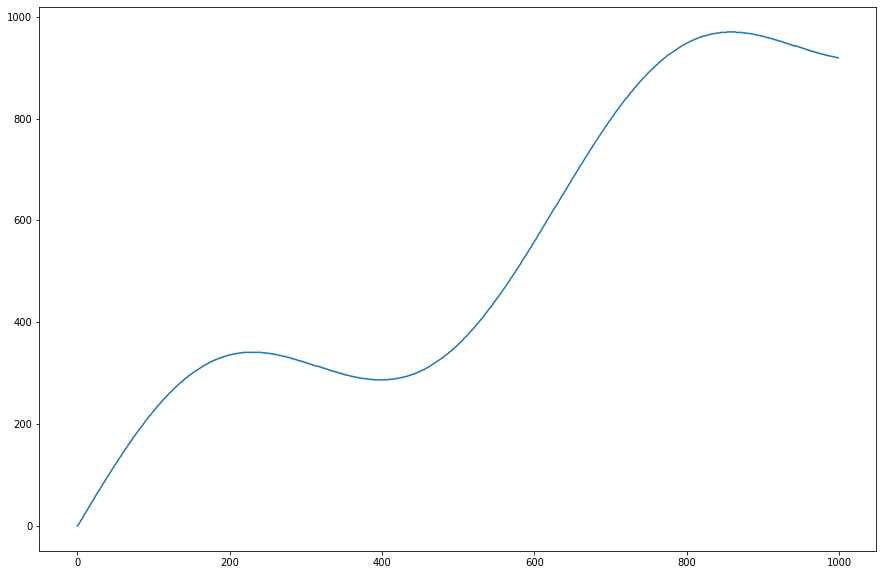

In [111]:
plt.figure(figsize=(15,10))
plt.plot(f)

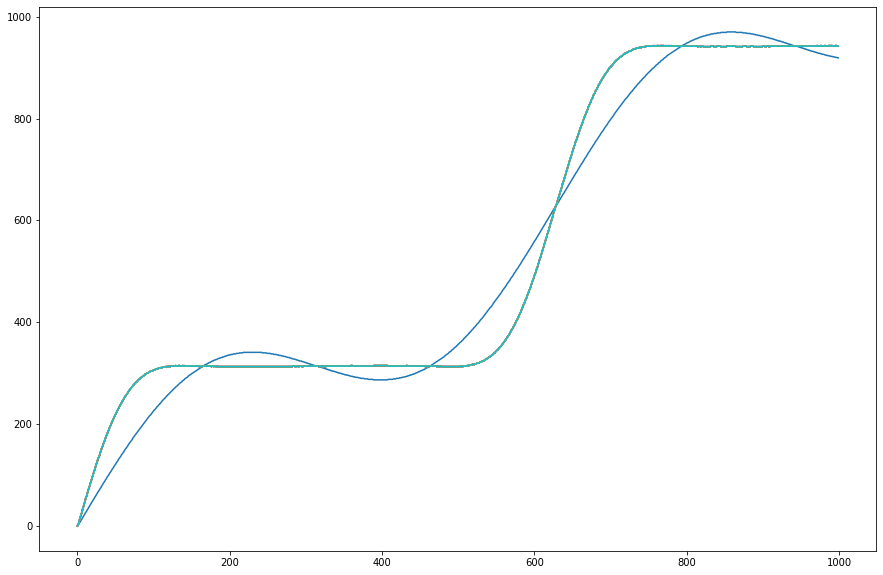

In [112]:
plt.figure(figsize=(15,10))
ff=f
for i in range(10):
    plt.plot(ff)
    ff=fmap1(f,.3)
plt.show()

In [102]:
N=1000
f=[min(N-1,i+int(400*math.sin(i/(N/20)))) for i in range(N)]

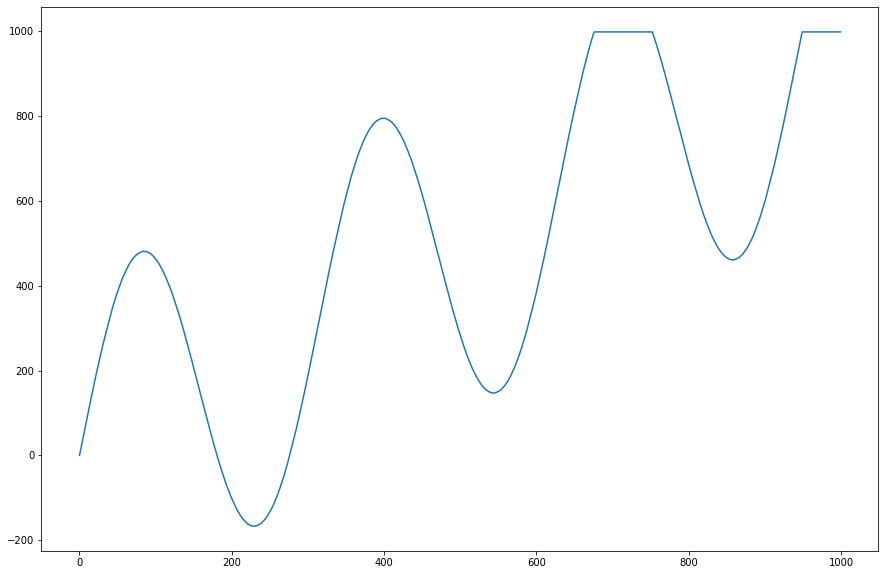

In [103]:
plt.figure(figsize=(15,10))
plt.plot(f)

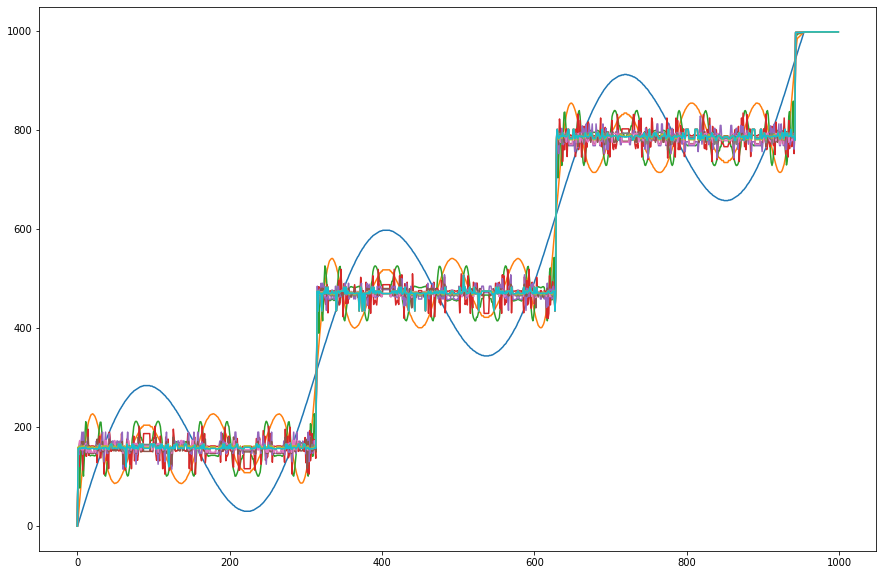

In [109]:

f=[min(N-1,i+int(200*math.sin(i/(N/20)))) for i in range(N)]

plt.figure(figsize=(15,10))
ff=f
for i in range(10):
    plt.plot(ff)
    ff=fmap1(ff,.3)
plt.show()

時間発展とともに階段関数になる。

# 時間発展のグラフ

<Figure size 1080x720 with 0 Axes>

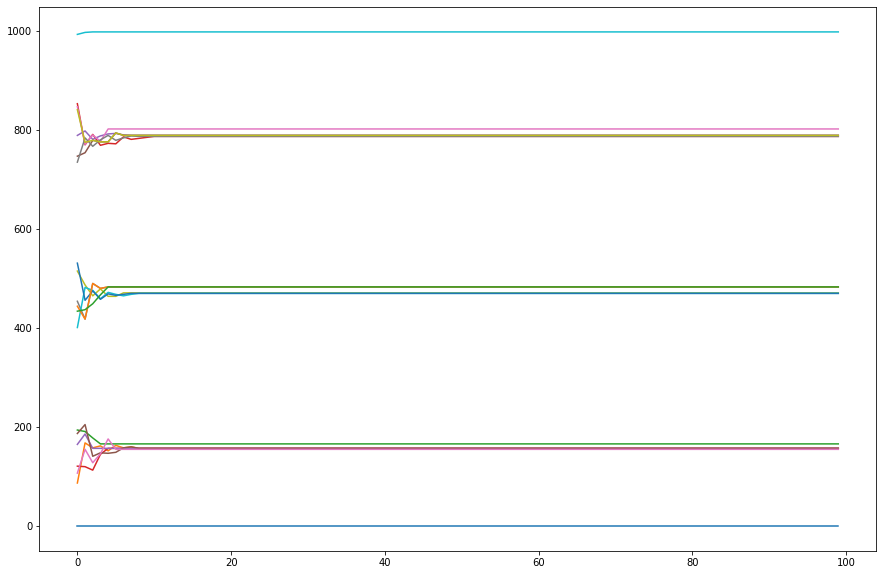

In [7]:
f=[min(N-1,i+int(200*math.sin(i/(N/20)))) for i in range(N)]

plt.figure(figsize=(15,10))
ff=f
fs=[[] for  i in range(20)]
for i in range(100):
    ff=fmap1(ff,.3)
    for j in range(20):
        fs[j].append(ff[j*(N//20)])
    
plt.figure(figsize=(15,10))   
for j in range(20):
    plt.plot(fs[j])
plt.show()


固定点に落ちていると言える

## 時間発展の重ね書き

ほぼランダムな関数

In [ ]:
f=[min(N-1,i+int(300*math.sin(i/(N/20)))) for i in range(N)]

plt.figure(figsize=(15,10))
ff=f

fs=[[] for  i in range(10)]
for i in range(100):
    plt.plot(ff)
    ff=fmap1(ff,.3)
    for j in range(10):
        fs[j].append(ff[j*100])
plt.show()

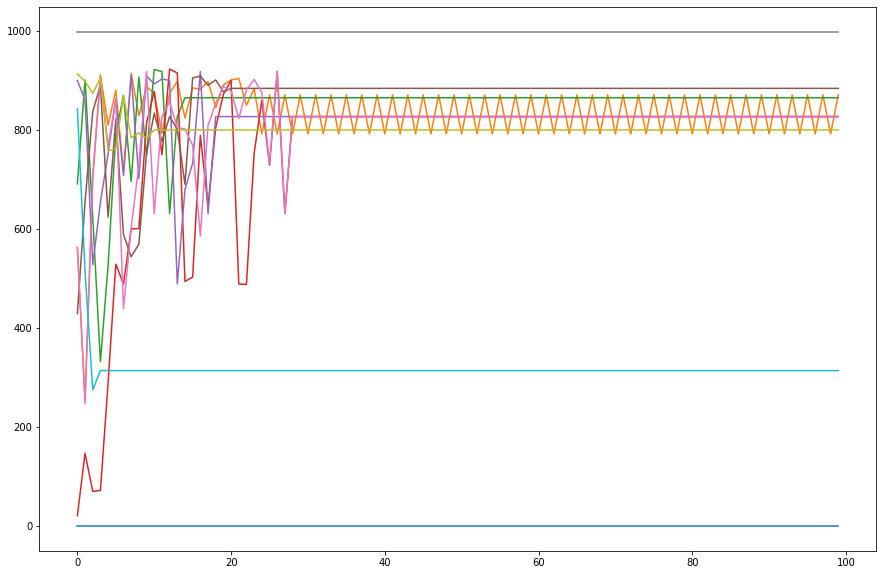

In [127]:
plt.figure(figsize=(15,10))

for j in range(10):
    plt.plot(fs[j])
plt.show()


<Figure size 1080x720 with 0 Axes>

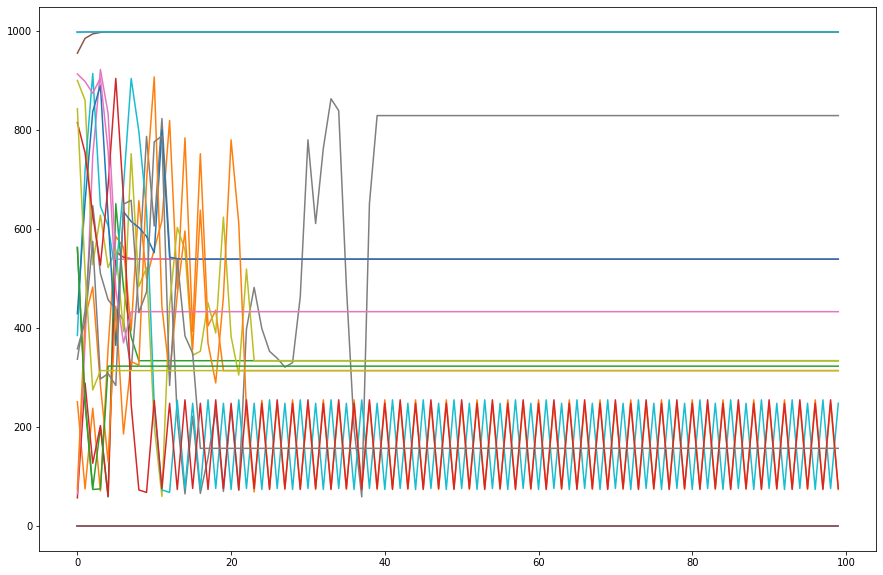

In [141]:
f=[max(0,min(N-1,i+int(300*math.sin(i/(N/20))))) for i in range(N)]

plt.figure(figsize=(15,10))
ff=f
fs=[[] for  i in range(20)]
for i in range(100):
    ff=fmap1(ff,.3)
    for j in range(20):
        fs[j].append(ff[j*(N//20)])
    
plt.figure(figsize=(15,10))   
for j in range(20):
    plt.plot(fs[j])
plt.show()


振動する部分がある

### 要素数Nを減らして見やすくする

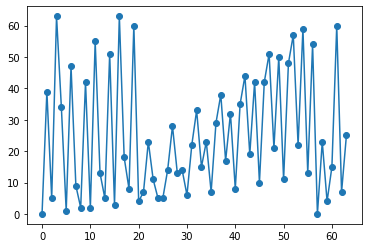

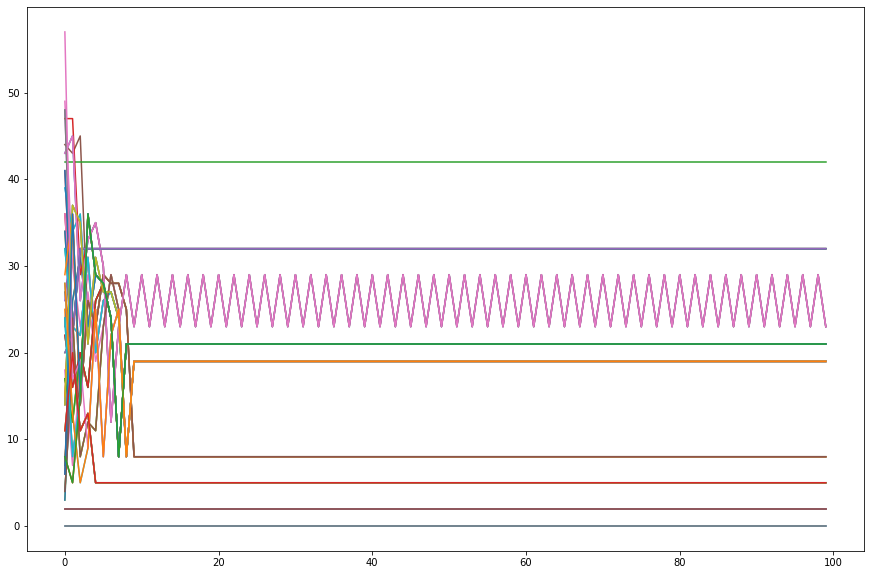

In [9]:
N=64
f=[ (i+int((N)*math.sin(i/(0.4))))%N for i in range(N)]
plt.plot(f,"o-")

sampleplot(f,N,eps=0.4,n=100,samplenum=N)

# Generated Mapの働き

### generated map

$f'=g(f(x))=(g \circ f)(x)$

$g(x)=F(x,f(x))$

### 可換性（準同型性)

$T\circ F(x,y)=F(T(x),T(y))$

例として線形の場合は

$T=ax+b$

$aF(x,y)+b=F(ax+b,ay+b)$

gの定義
$f'(x)=g(f(x))$から

$f(x_0)=x_0$ (type I)の時

$g(x)=f(x)+x_0$

## generated mapの図示

In [ ]:
eps=0.1
N=1000

a=3.*N
b=0.2*N

f=lambda x:(2*x)%N
ind=[ x for  x in range(N)]
fx=[ f(x) for x in ind]
x0s=[x for x in ind if x==f(x)]

gx=[a*f(x)+x0 for x in range(N)]



# Type II固定点

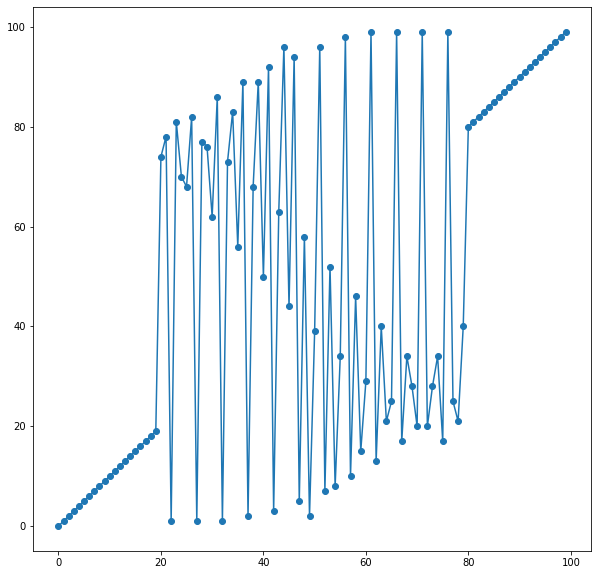

In [20]:
N=100
x0=20
x1=80
f0=[x for x in range(x0)]
f1=[int((N)*math.sin(x/(0.4)))%N for x in range(x0,x1)]
f2=[x for x in range(x1,N)]
f=f0+f1+f2

plt.figure(figsize=(10,10))
plt.plot(f,"o-")



### $\epsilon$を変えて重ね書きする

eps= 0.0


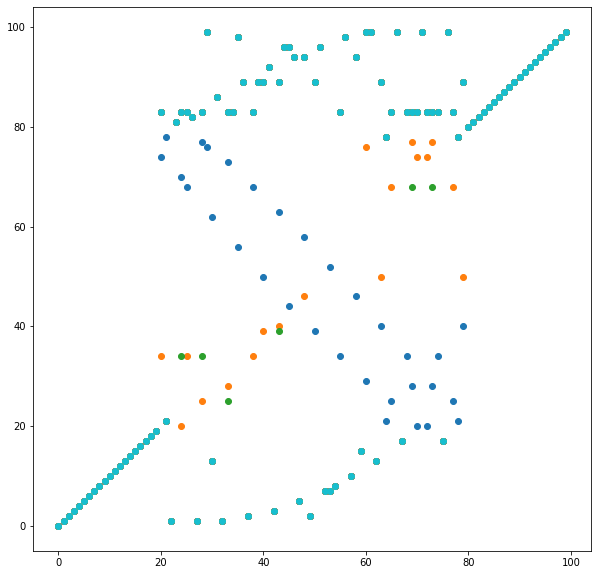

eps= 0.1


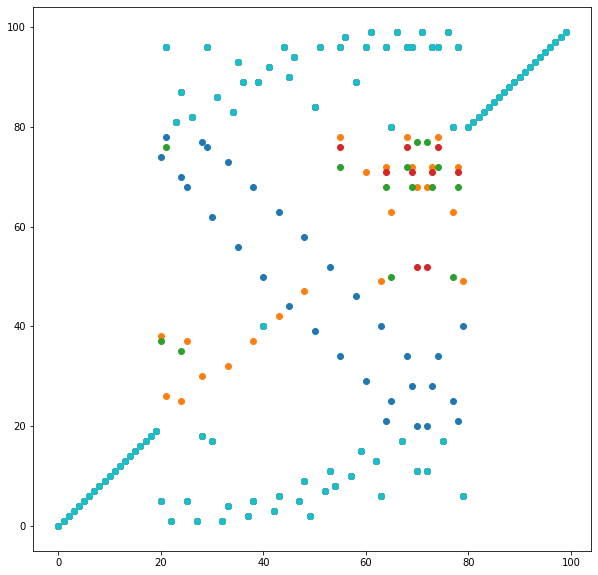

eps= 0.2


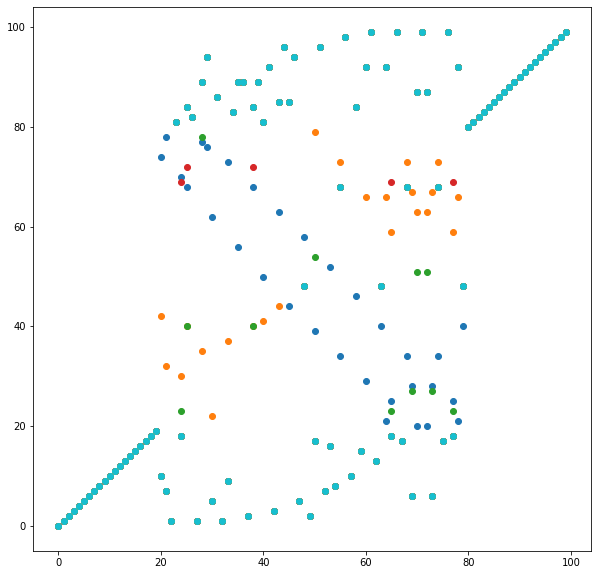

eps= 0.3


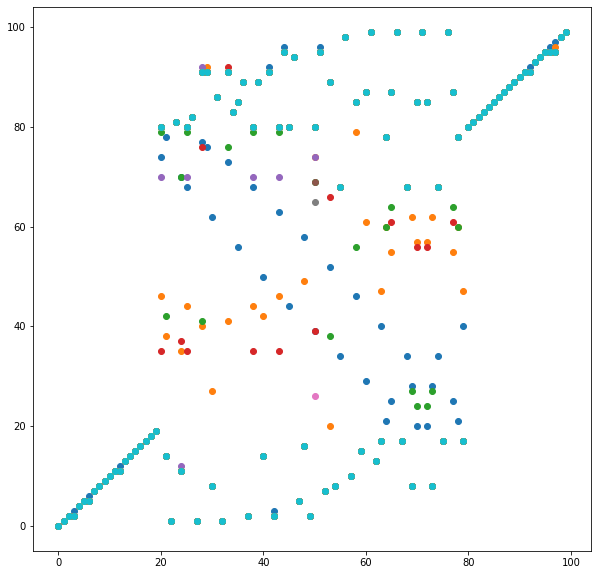

eps= 0.4


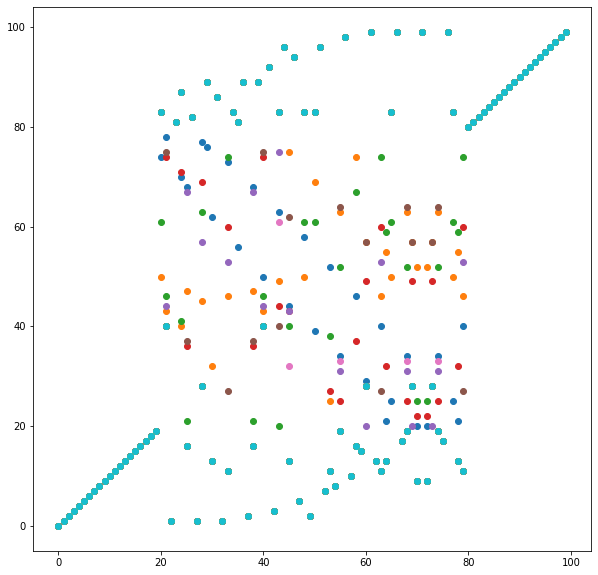

eps= 0.5


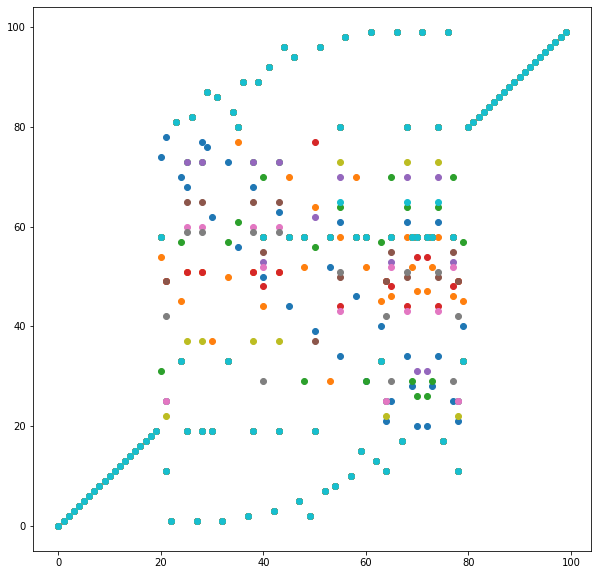

eps= 0.6


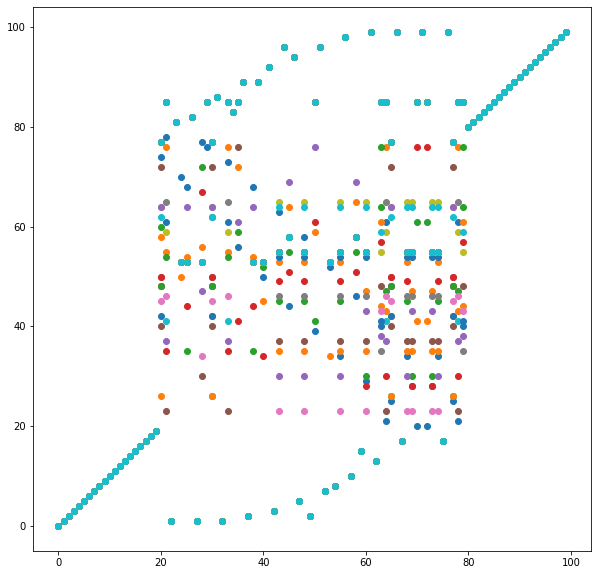

eps= 0.7


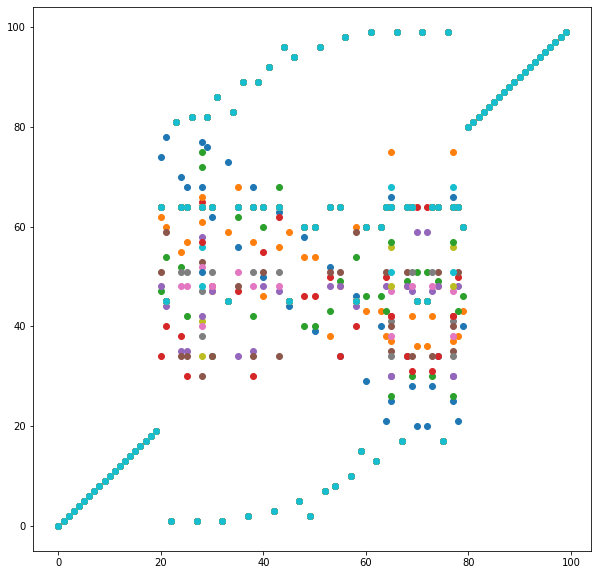

eps= 0.8


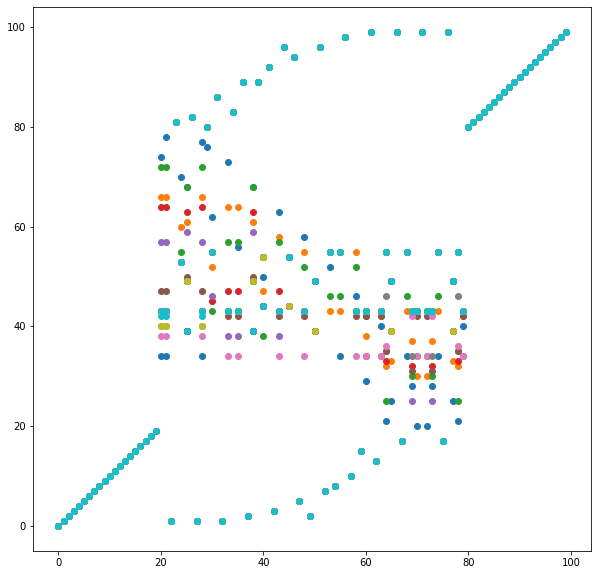

eps= 0.9


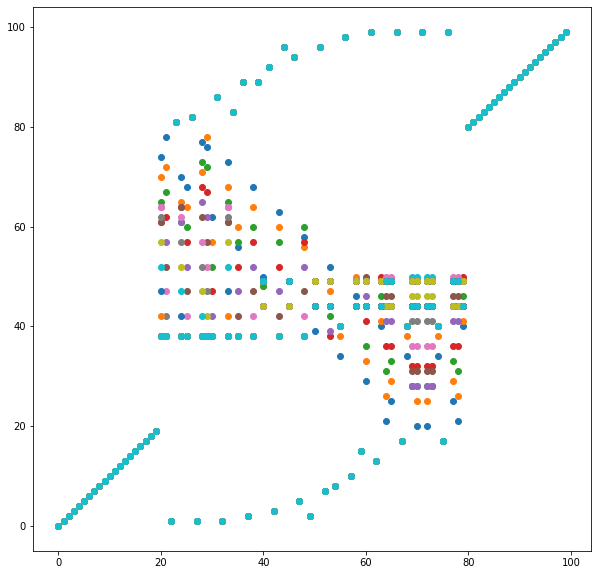

In [99]:
for i in range(10):
    eps=i/10
    print("eps=",eps)
    plots(f,eps=eps,size=(10,10))

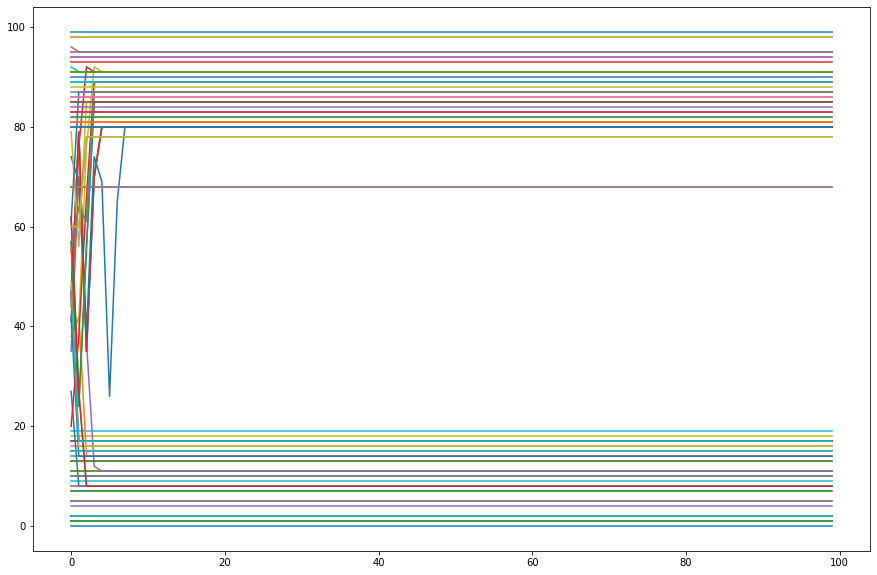

In [23]:
sampleplot(f,N,eps=eps,n=100,samplenum=N)

# Nagumo-Sato map

In [48]:
NagumoSato=lambda k,omega,N=1000:[int((k*x+omega)%N) for x in range(N)]

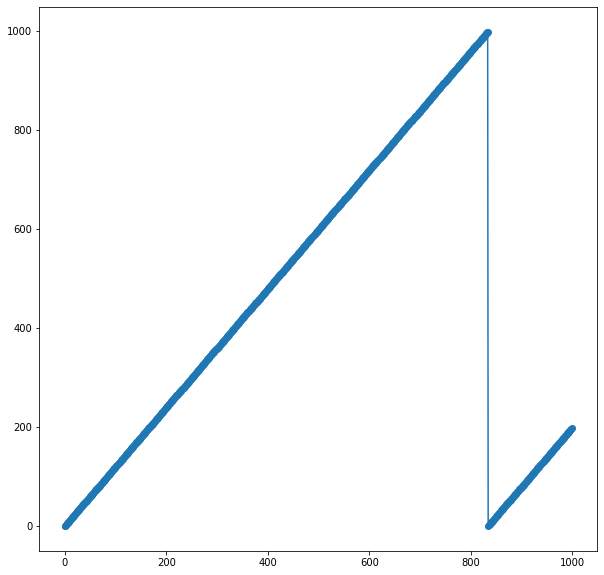

In [50]:
NS=NagumoSato(1.2,0.1)
plt.figure(figsize=(10,10))
plt.plot(NS,"o-")

### 発展の様子

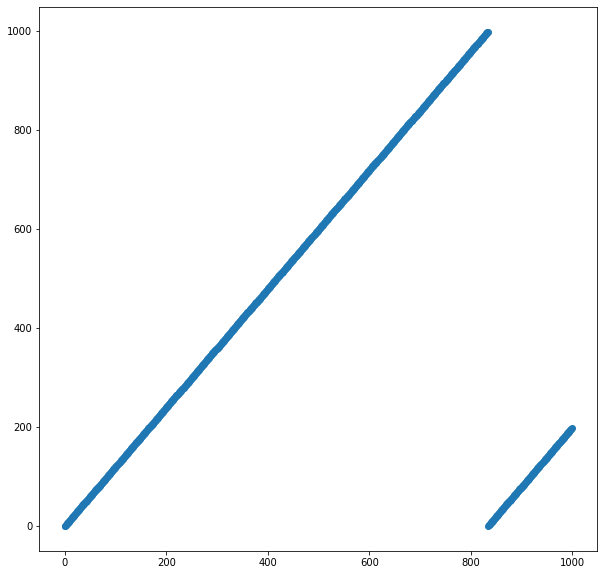

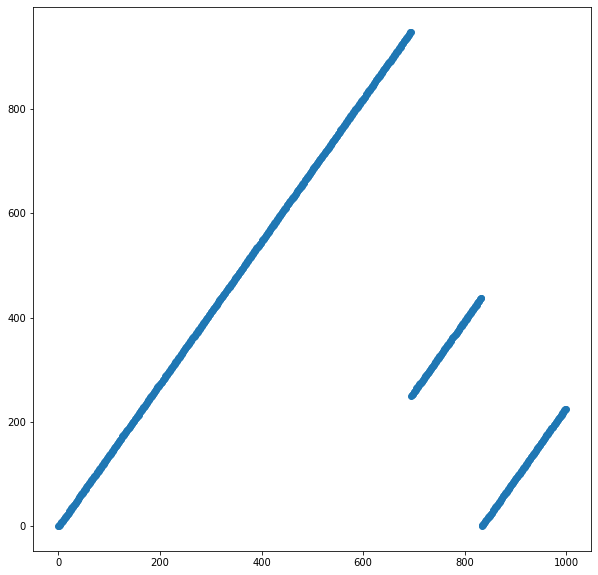

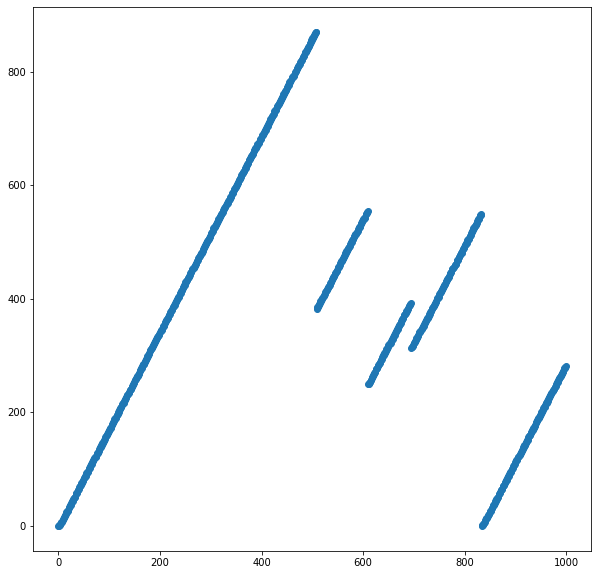

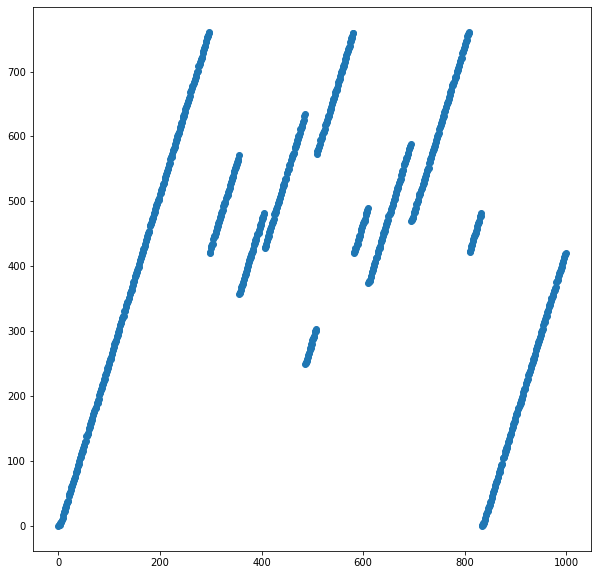

In [70]:
for t in range(1,5):
    plots(NS,eps=0.3,size=(10,10),step=t,overwrite=False)

### $\epsilon$を変えて重ね書きする


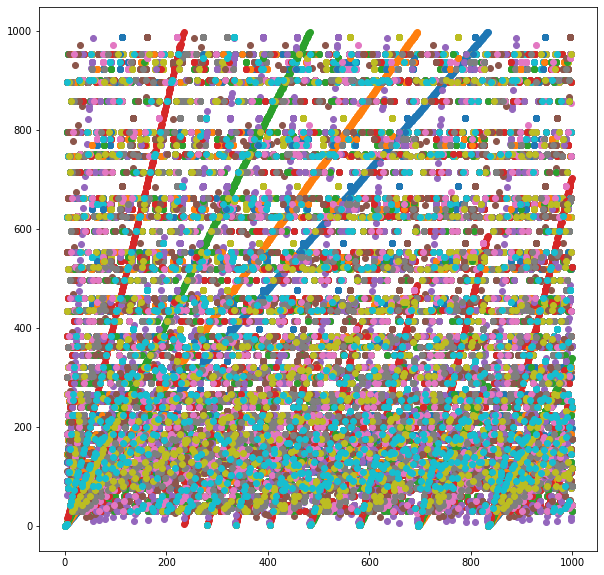

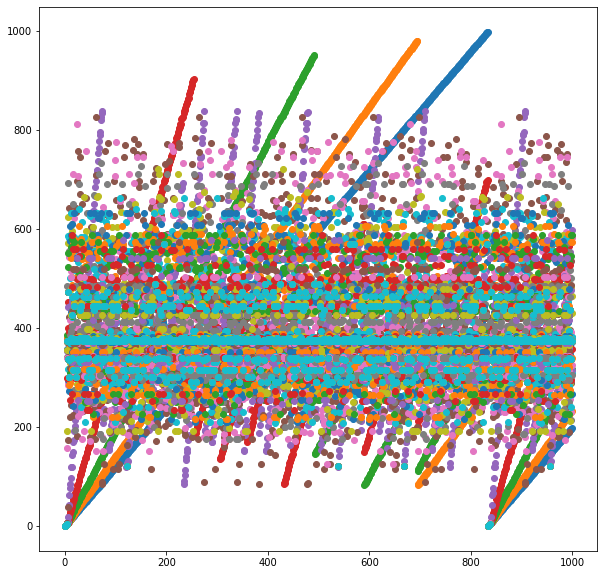

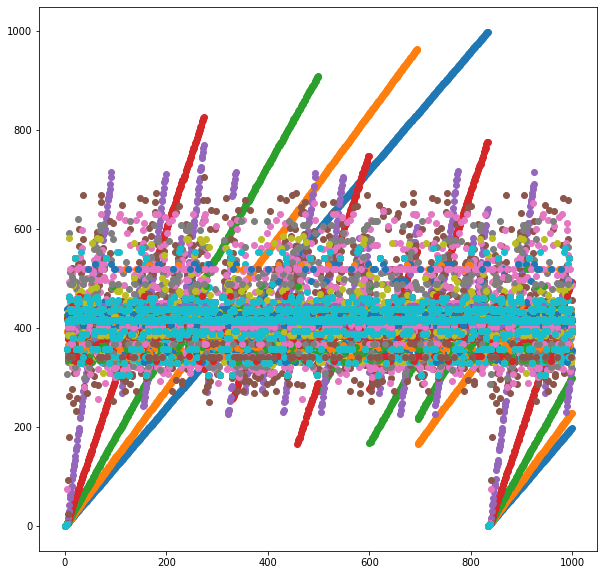

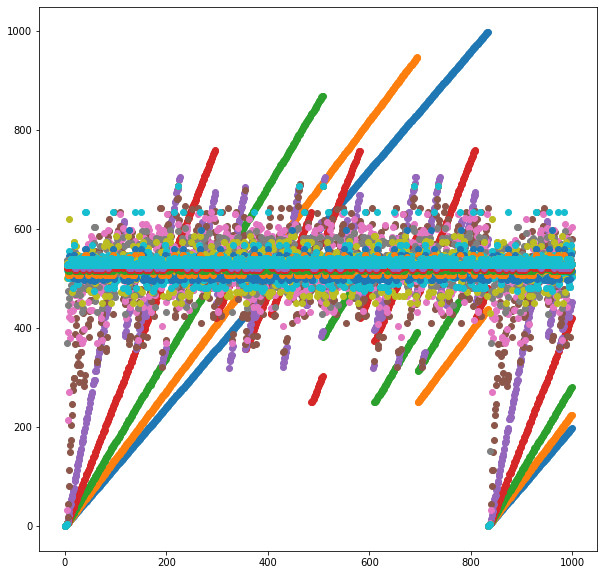

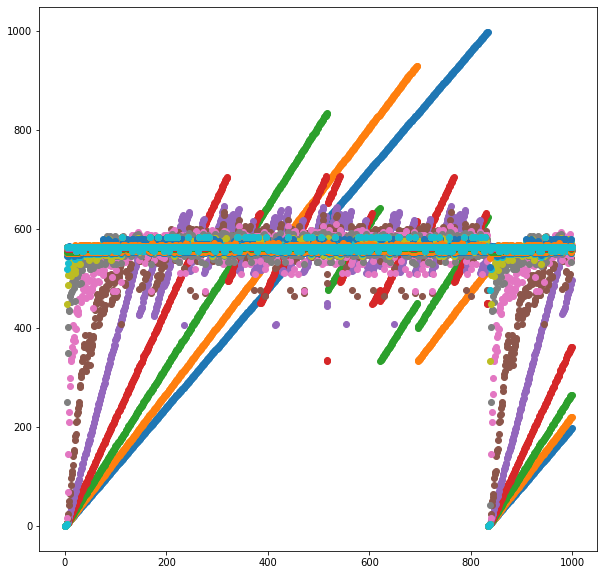

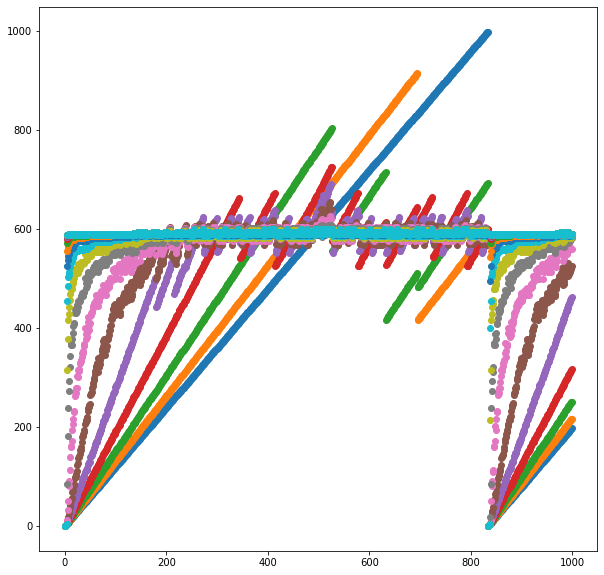

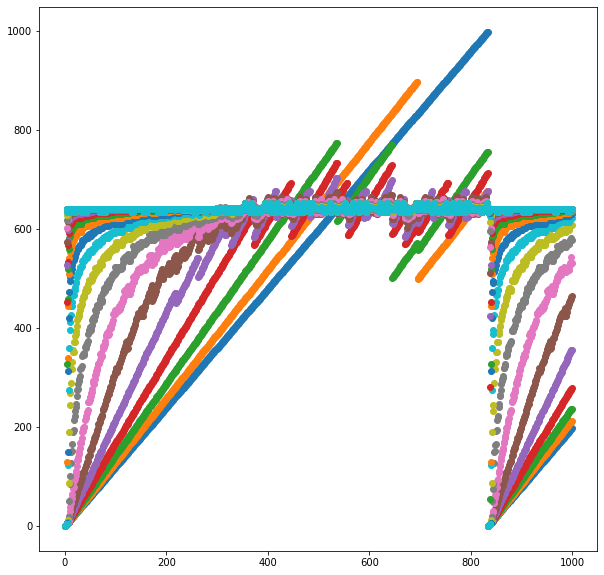

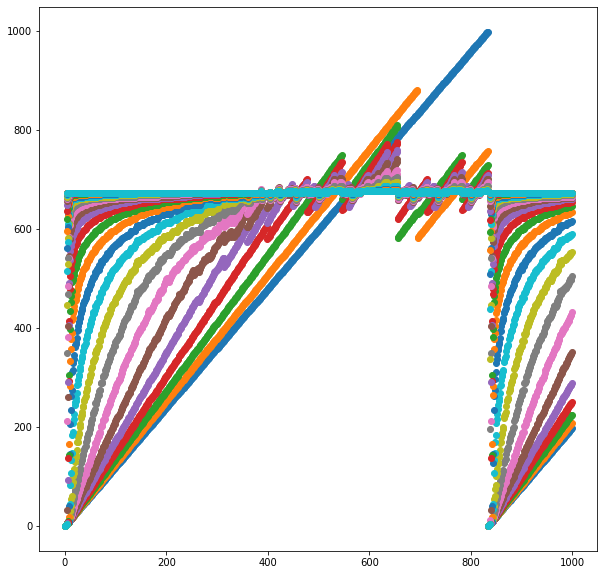

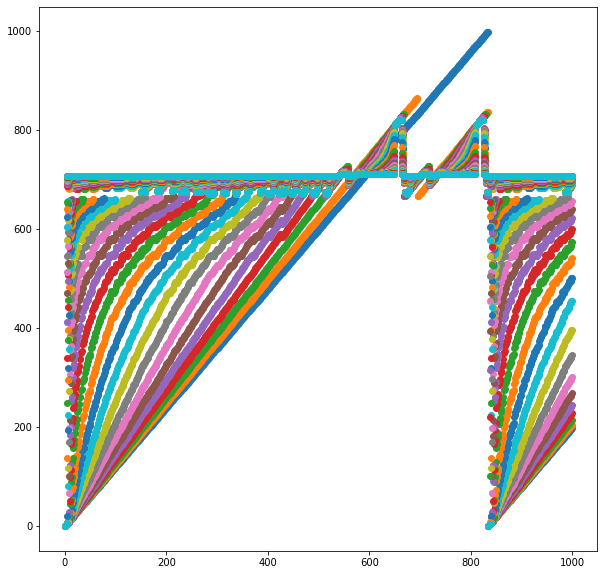

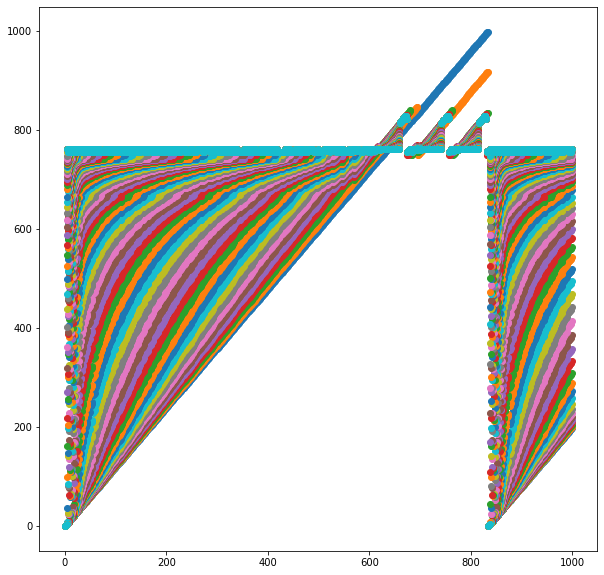

In [65]:
for i in range(10):
    plots(NS,eps=i/10,size=(10,10))

## embedded Nagumo-Sato map

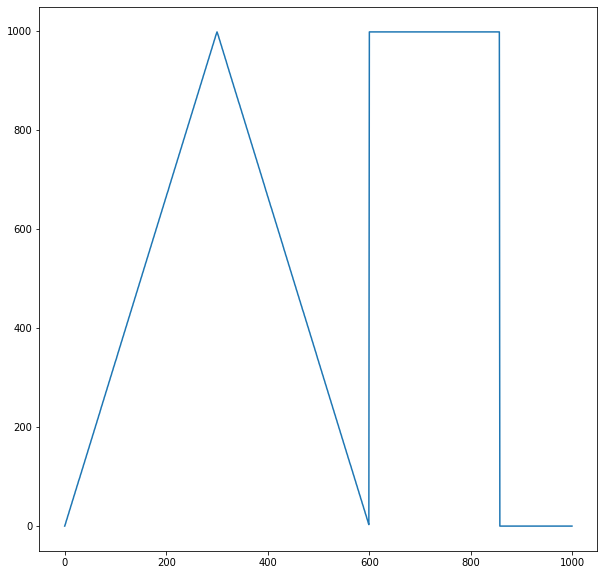

In [96]:
def emb_NagumoSato(eps=.3,k=1.2,w=0.4,N=1000):
    a=(1-w)/(1-eps)
    b=1-w
    assert(a<1)
    
    x0=int(N*b)
    x1=int(N*a)
    f00=[N*( 1-2/b*abs(x/N-b/2)) for x in range(x0)]
    f01=[N-1 for x in range(x0,x1)]
    f02=[0 for x in range(x1,N)]
    return [ min(int(x),N-1) for x in f00+f01+f02]

eNS=emb_NagumoSato(k=.1)

plt.figure(figsize=(10,10))
plt.plot(eNS)

eps= 0.0


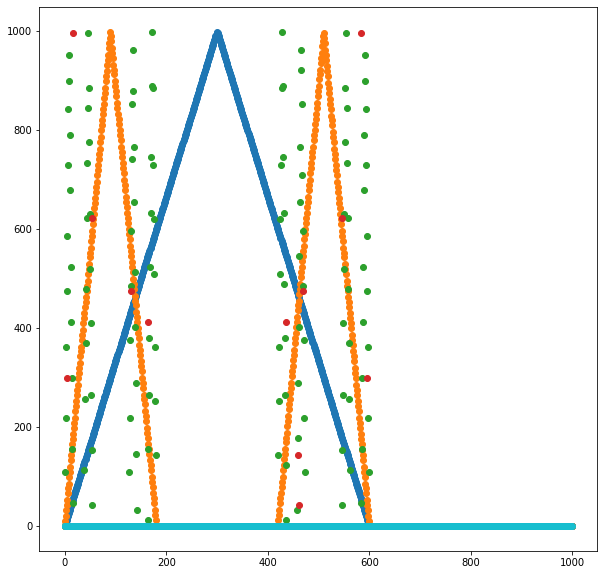

eps= 0.1


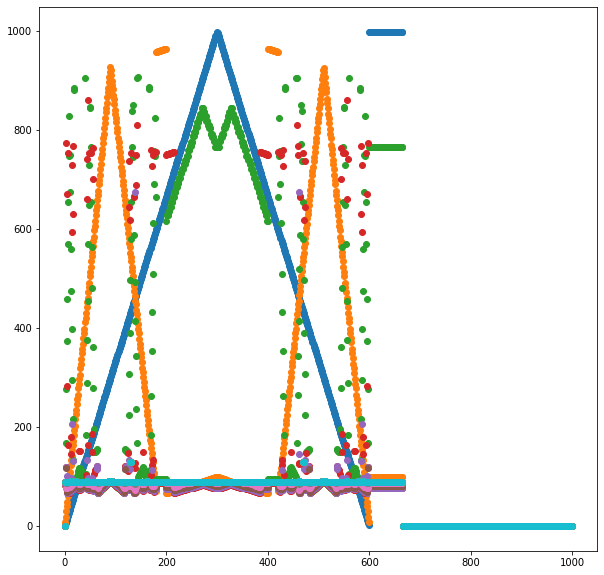

eps= 0.2


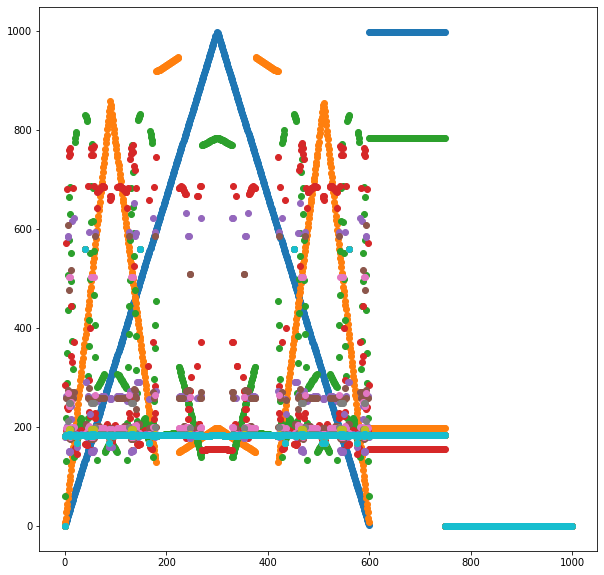

eps= 0.3


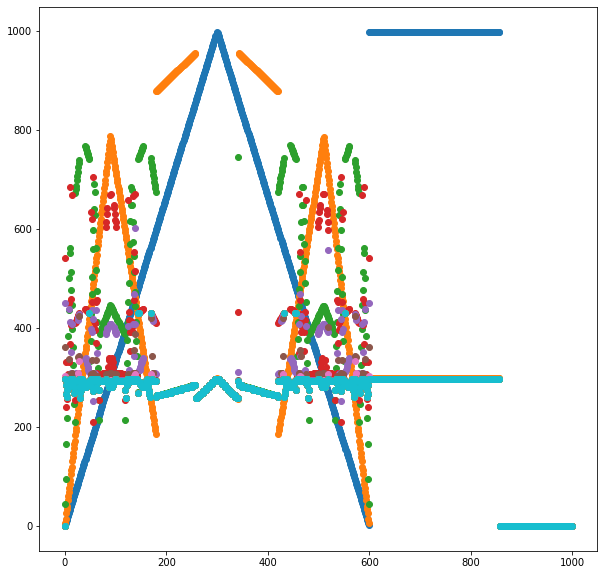

eps= 0.4


AssertionError: 

In [98]:
for i in range(10):
    eps=i/10
    print("eps=",eps)
    eNS=emb_NagumoSato(eps=eps)
    plots(eNS,eps=eps,size=(10,10))    